In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(load_wine()["data"],columns=load_wine()["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [4]:
print(len(df))

178


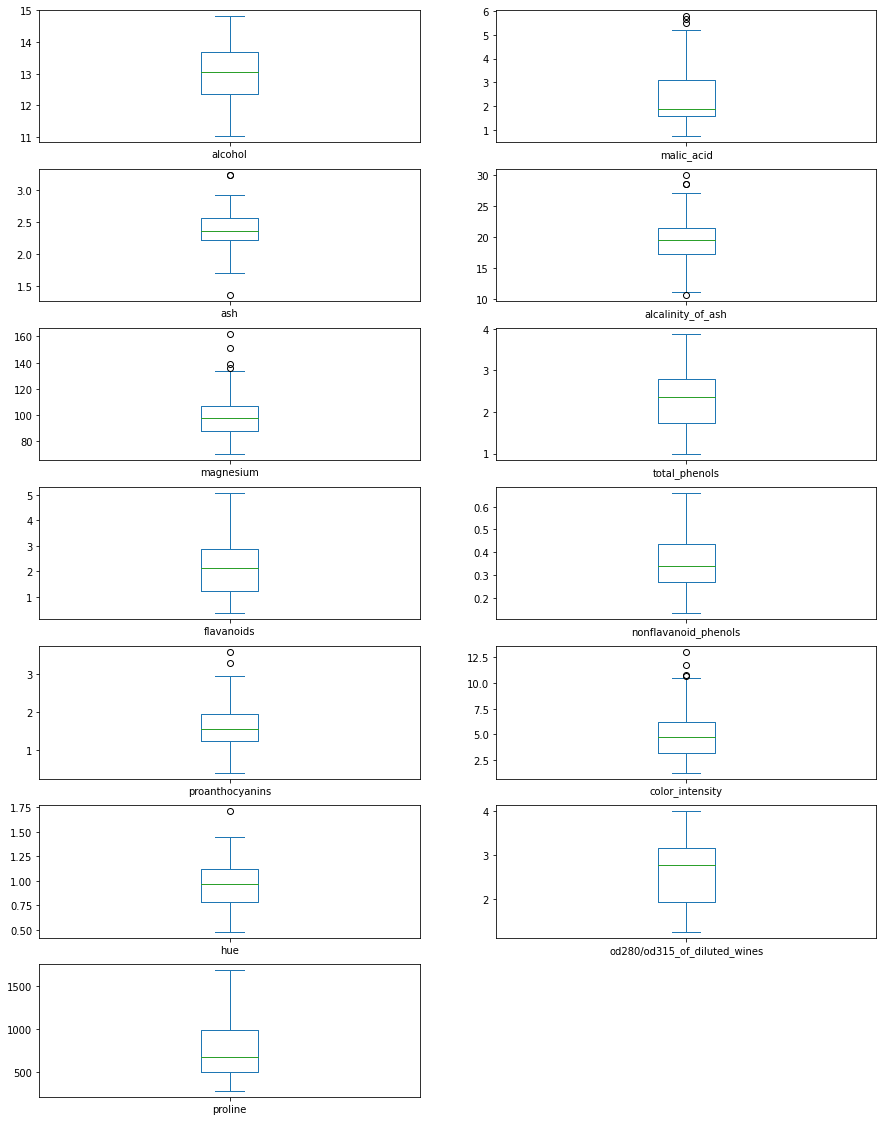

In [5]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

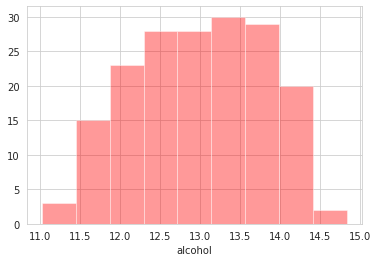

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.distplot(df['alcohol'], kde = False, color ='red')

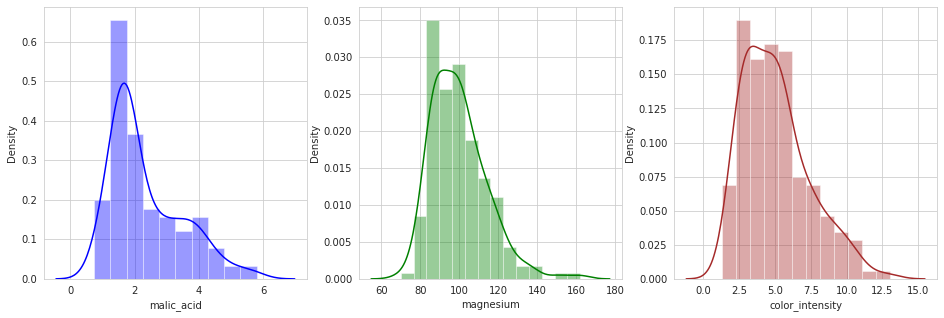

In [7]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['malic_acid'],color = 'blue')
plt.subplot(1,3,2)
sns.distplot(df['magnesium'],color = 'green')
plt.subplot(1,3,3)
sns.distplot(df['color_intensity'],color ='brown')
plt.show()

#Outlier Detection Using Standard Deviation

In [8]:
df['malic_acid'].describe()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64

In [9]:
print("Highest allowed",df['malic_acid'].mean() + 3*df['malic_acid'].std())
print("Lowest allowed",df['malic_acid'].mean() - 3*df['malic_acid'].std())

Highest allowed 5.68778660745013
Lowest allowed -1.0150899782366465


In [10]:
upper_limit = df['malic_acid'].mean() + 3*df['malic_acid'].std()
lower_limit = df['malic_acid'].mean() - 3*df['malic_acid'].std()

In [11]:
df_1 = df[(df['malic_acid']>lower_limit) & (df['malic_acid']<upper_limit)]

In [12]:
len(df_1)

177

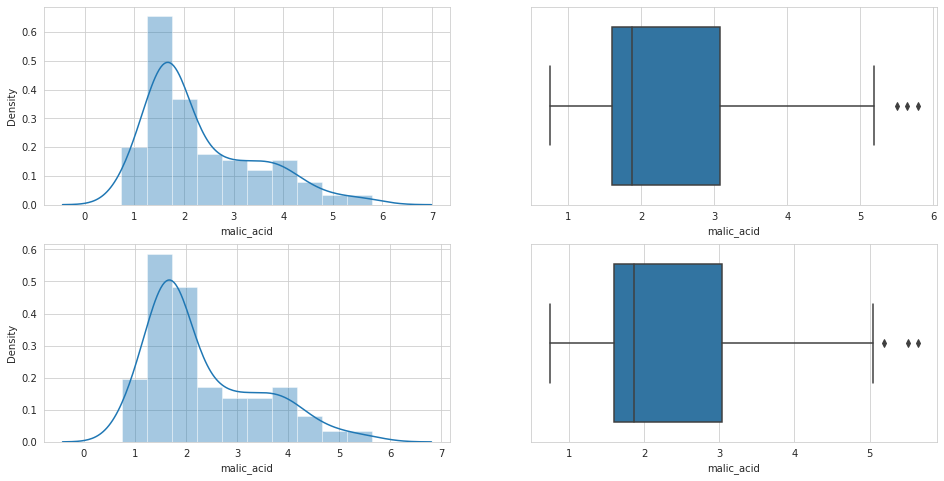

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['malic_acid'])
plt.subplot(2,2,2)
sns.boxplot(df['malic_acid'])
plt.subplot(2,2,3)
sns.distplot(df_1['malic_acid'])
plt.subplot(2,2,4)
sns.boxplot(df_1['malic_acid'])
plt.show()

#Outlier Detection Using the Interquartile Range (IQR)

In [14]:
df_1['magnesium'].describe()

count    177.000000
mean      99.819209
std       14.285286
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

In [15]:
percentile25 = df_1['magnesium'].quantile(0.25)
percentile75 = df_1['magnesium'].quantile(0.75)

In [16]:
iqr = percentile75-percentile25

In [17]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [18]:
print(upper_limit)
print(lower_limit)

135.5
59.5


In [19]:
df2= df_1[(df_1['magnesium']>lower_limit) & (df_1['magnesium']<upper_limit)]

In [20]:
len(df2)

173

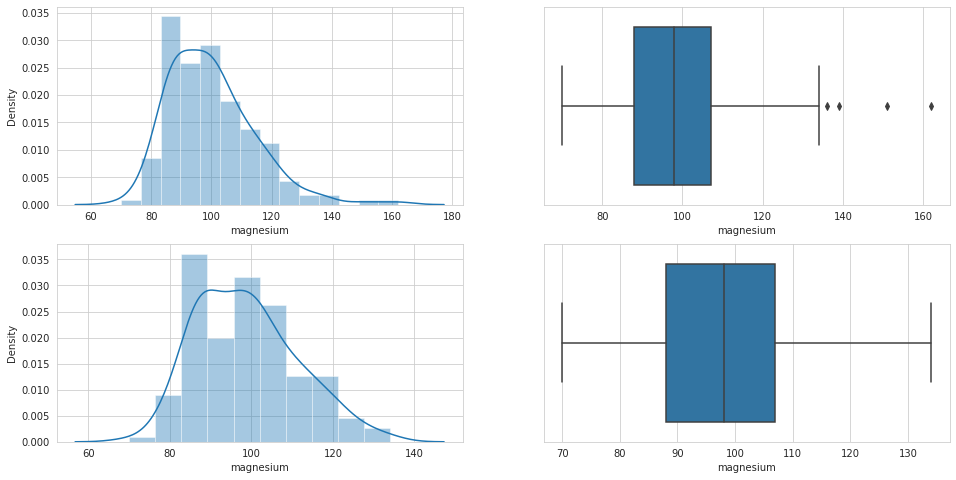

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_1['magnesium'])
plt.subplot(2,2,2)
sns.boxplot(df_1['magnesium'])
plt.subplot(2,2,3)
sns.distplot(df2['magnesium'])
plt.subplot(2,2,4)
sns.boxplot(df2['magnesium'])
plt.show()

#Outlier Detection Using Z-Score

In [22]:
df2['color_intensity'].describe()

count    173.000000
mean       5.118728
std        2.322807
min        1.280000
25%        3.250000
50%        4.800000
75%        6.250000
max       13.000000
Name: color_intensity, dtype: float64

In [23]:
df2['z_score']=(df2['color_intensity'] - df2['color_intensity'].mean())/df2['color_intensity'].std()

In [24]:
df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,z_score
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.224415
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,-0.318033
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.241635
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.154324
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,-0.343863


In [25]:
df3= df2[(df2['z_score']>-3) & (df2['z_score']<3)]

In [26]:
len(df3)

172

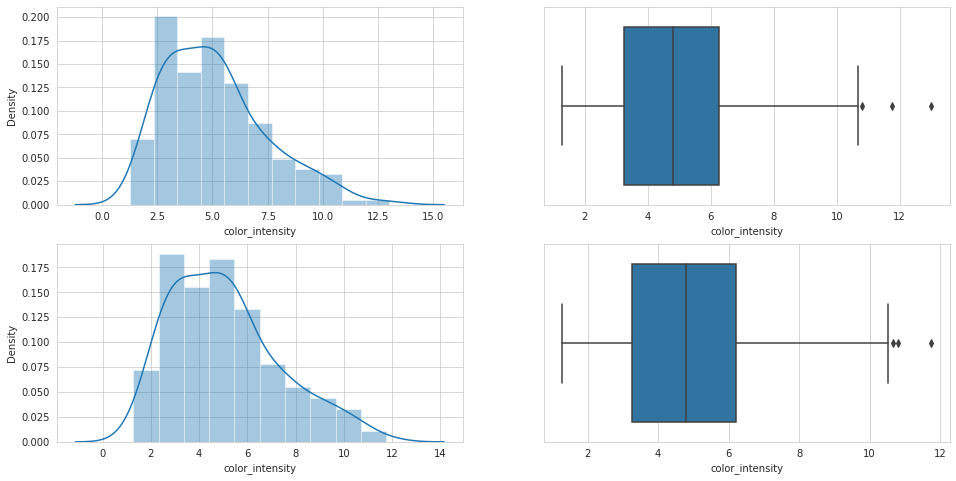

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2['color_intensity'])
plt.subplot(2,2,2)
sns.boxplot(df2['color_intensity'])
plt.subplot(2,2,3)
sns.distplot(df3['color_intensity'])
plt.subplot(2,2,4)
sns.boxplot(df3['color_intensity'])
plt.show()